In [1]:
import numpy as np
import xarray as xr
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
rng = np.random.default_rng(seed=0)   # 给一个随机数种子，使得每次运行得到的随机数是相同的

# 创建xarray对象

_**Xarray**_ 包提供了两种数据储存结构： _**<font color=orange>DataArray 类</font>**_ 和 _**<font color=orange>Dataset 类</font>**_  
- DataArray 将维度名称，坐标和属性添加到多维数组  
- Dataset 则是多个 DataArray 数组的集合

## _**DataArray**_ 类

_**<font color=orange>DataArray</font>**_ 是一个容器，装一个变量的信息，比如可以把温度在时空的变化放在里面

<font size=4> _**<font color=skyblue>xr.DataArray( <font color=orange>data</font>, <font color=orange>dims</font>, <font color=orange>name</font>, <font color=orange>coords</font>, <font color=orange>attrs</font> )</font>**_

### 添加数据、维度名称和数组名称：  
  
可以注意到 _**<font color=skyblue>xr.DataArray( )</font>**_ 括号内的三行内容：  
- data : 利用 Numpy 包的 np.ones 函数创建一个 2x6x6 numpy 类的全1数组  
- dims : 把三个维度分别命名为 time, lon, lat  
- name : 取了一个名字 Temperature Data

In [2]:
da = xr.DataArray(
    np.ones((2, 7, 13)),              # 温度数据
    dims = ("time", "lat", "lon"),   # 维度名称
    name = "Temperature Data"        # 数组名称
)
da

<xarray.DataArray 'Temperature Data' (time: 2, lat: 7, lon: 13)>
array([[[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]]])
Dimensions without coordinates: time, lat, lon

### 添加坐标信息：
  
对坐标数据而言，是用 _**<font color=orange>coords = { }</font>**_ 大括号框定的区域。  
  
_**<font color=ff8888>"longtitude" : ( "lon", np.arange(0, 181, 30) )</font>**_ 中 :   
- _**<font color=ff8888>  "longtitude"</font>**_ 是坐标名称,   
- _**<font color=ff8888>  "lon"</font>**_ 是坐标名称对应的维度,   
- _**<font color=ff8888>  np.arange(0, 181, 30)</font>**_ 是维度 "lon" 对应坐标数据

In [3]:
da = xr.DataArray(
    np.ones((2, 7, 13)),           # 温度数据
    dims=("time", "lat", "lon"),  # 维度名称
    name="Temperature Data",      # 数组名称
    # 坐标属性
    coords={
        "longtitude": ("lon", np.linspace(0, 360, 13)),                   
        "latitude":   ("lat", np.linspace(-90, 90, 7)), 
        "time":       ("time", ['2021-01-01','2021-01-02'])
    }
)
da

<xarray.DataArray 'Temperature Data' (time: 2, lat: 7, lon: 13)>
array([[[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]]])
Coordinates:
    longtitude  (lon) float64 0.0 30.0 60.0 90.0 ... 270.0 300.0 330.0 360.0
    latitude    (lat) float64 -90.0 -60.0 -30.0 0.0 30.0 60.0 90.0
  * time        (time) <U10 '2021-01-01' '2021-01-02'
Dimensions without coordinates: lat, lon

### 添加数据属性：

In [4]:
da = xr.DataArray(
    np.ones((2, 7, 13)),           # 温度数据
    dims=("time", "lat", "lon"),  # 维度名称
    name="Temperature Data",      # 数组名称
    # 坐标属性
    coords={
            "longtitude": ("lon", np.linspace(0, 360, 13)),                   
            "latitude":   ("lat", np.linspace(-90, 90, 7)), 
            "time":       ("time", ['2021-01-01','2021-01-02'])
    }, 
    # 属性
    attrs={
            "Autor": "WANG BJ", 
            "FillValue": -9999
    }
)
da

<xarray.DataArray 'Temperature Data' (time: 2, lat: 7, lon: 13)>
array([[[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]]])
Coordinates:
    longtitude  (lon) float64 0.0 30.0 60.0 90.0 ... 270.0 300.0 330.0 360.0
    latitude    (lat) float64 -90.0 -60.0 -30.0 0.0 30.0 60.0 90.0
  * time        (time) <U10 '2021-01-01' '2021-01-02'
Dimensions without coordinates: lat, lon
Attributes:
    Autor:      WANG BJ
    FillValue:  -9999

### 添加坐标属性：  
  
有时候坐标参数（如经纬度）需要附加一些信息, 例如可以附加经纬度的单位（degree）  
  
添加坐标参数属性的方法即在坐标值的后面添加上一个 **<font color=ff8888>大括号 { "属性": value }</font>** 括好的数据，  
如：_<font color=ff8888>"latitude":("lon",np.arange(0, 361, 30),_ _**{"unit": "degree"})</font>**_ ，冒号的左侧为属性名称，右侧为对应的值。   
   
对于多个属性的添加，需用 **<font color=ff8888>逗号</font>** 进行间隔，如 _**<font color=ff8888>{"step": "5 degree","first value":1}</font>**_   

In [5]:
da = xr.DataArray(
    np.ones((2, 7, 13)),           # 温度数据
    dims=("time", "lat", "lon"),  # 维度名称
    name="Temperature Data",      # 数组名称
    # 坐标属性
    coords={
        "longtitude": ("lon", np.linspace(0, 360, 13), {"unit": "degree"}),  # 添加坐标属性                 
        "latitude": ("lat", np.linspace(-90, 90, 7), {"unit": "degree"}),   # 添加坐标属性
        "time": ("time", ['2021-01-01','2021-01-02'])
    }, 
    # 属性
    attrs={
        "Autor": "WANG BJ", 
        "FillValue": -9999
    }
)
da

<xarray.DataArray 'Temperature Data' (time: 2, lat: 7, lon: 13)>
array([[[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]]])
Coordinates:
    longtitude  (lon) float64 0.0 30.0 60.0 90.0 ... 270.0 300.0 330.0 360.0
    latitude    (lat) float64 -90.0 -60.0 -30.0 0.0 30.0 60.0 90.0
  * time        (time) <U10 '2021-01-01' '2021-01-02'
Dimensions without coordinates: lat, lon
Attributes:
    Autor:      WANG BJ
    FillValue:  -9999

### 提取数据、维度、坐标和属性信息

提取 da 数据 ( data ) ：

In [6]:
da.data

array([[[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]]])

提取 da 维度名称 ( dimensions ) ：

In [7]:
da.dims

('time', 'lat', 'lon')

提取 da 坐标信息 ( coordinates ) ：

In [8]:
da.coords

Coordinates:
    longtitude  (lon) float64 0.0 30.0 60.0 90.0 ... 270.0 300.0 330.0 360.0
    latitude    (lat) float64 -90.0 -60.0 -30.0 0.0 30.0 60.0 90.0
  * time        (time) <U10 '2021-01-01' '2021-01-02'

提取 da 属性 ( attributes ) ：

In [9]:
da.attrs

{'Autor': 'WANG BJ', 'FillValue': -9999}

### 练习1

现已通过随机函数常见了一个名为 **<font color=ff8888>height</font>** 伪数据   
  
1.不考虑创建的其他要素，试着以 **<font color=ff8888>height</font>** 为基础数据创建一个 **<font color=ff8888>DataArray</font>** 对象。下面提供了部分代码。  
    
2.添加维度名字“x”和“y”。  
  
3.添加数组名称“My random array”  
  
4.分别对“x”和“y”维度添加坐标“longtitude”（经度）和“latitude”（纬度）。；经度从-180至180，步长为1；纬度从-90至90，步长为1。  

In [10]:
height = rng.random((180, 360)) * 400
# 在这里写你的代码
xr.DataArray(
    height, 
    dims=("y", "x"), 
    name="My random array", 
    coords={
        "longtitude": ("x", np.linspace(1, 360, 360), {"steps": 1}), 
        "latitude": ("y", np.linspace(-89.5, 89.5, 180), {"steps": 1})
    }
)

<xarray.DataArray 'My random array' (y: 180, x: 360)>
array([[254.78467493, 107.91468551,  16.38940957, ..., 360.44323737,
        136.69706008,  95.57748468],
       [328.71680109, 233.99307209, 190.63536868, ..., 376.94421292,
        320.89846253,  48.94701864],
       [ 49.77143929, 246.49670012, 108.4826731 , ..., 107.27040832,
         86.18459353, 339.32512596],
       ...,
       [191.29475178,  64.01085709, 285.03118114, ...,  90.39013016,
        397.52540689, 309.36475129],
       [145.41534826,  16.18463217, 236.01756475, ..., 388.09452038,
         96.19908112, 183.22058129],
       [393.64705664,   2.99353683, 129.50138154, ..., 130.89893988,
        101.70591237, 159.53358201]])
Coordinates:
    longtitude  (x) float64 1.0 2.0 3.0 4.0 5.0 ... 357.0 358.0 359.0 360.0
    latitude    (y) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Dimensions without coordinates: y, x

## _**Dataset**_ 类

<font size=4> _**<font color=skyblue>xr.Dataset( <font color=orange>data_vars</font>, <font color=orange>coords</font>, <font color=orange>attrs</font> )</font>**_

_**<font color=ff8888>Dataset</font>**_ 的对象可以将 **<font color=ff8888>多个变量</font>** 放在一起。可以定义每一个变量都有相应不同维度。  
  
_**<font color=ff8888>Dataset</font>**_ 由下列三个部分组成  
- _**<font color=ff8888>data_vars</font>**_ ：变量信息, "var":(dims,data,{"attr":value}) / "var":DataArray  
- _**<font color=ff8888>coords</font>**_ ：坐标信息  
- _**<font color=ff8888>attrs</font>**_ ：属性信息

### 添加变量、坐标和属性  
  
_**<font color=orange>data_vars</font>**_  的大括号 _**<font color=ff8888>{ "var": (dims, data, {"属性": value}) }</font>**_ 中包含了 _**<font color=orange>a</font>**_ 和 _**<font color=orange>b</font>**_ 两个变量，变量名后以小括号扩住这个变量的信息。小括号的信息包含下列信息  
- _**<font color=ff8888>维度</font>**_ ：在命名维度名称的同时，也就确定了维度的大小。例子中包含两个维度x和y。  
- _**<font color=ff8888>数据</font>**_ ：数据大小的确定根据维度的大小所决定。例子中是利用np.ones函数构建了一个3×4的全1矩阵，利用np.full函数构建项数为8全为3的一维数组。  
- _**<font color=ff8888>属性</font>**_ ：用大括号包含。写法：名称字符串+冒号:+属性值字符串。不同属性之间用逗号间隔，类似于 _**<font color=ff8888>{"atrri1": "First", "atrri2": "Second"}</font>**_   
  
_**<font color=orange>coords</font>**_ 的大括号包含了具体的坐标参数。与   _**<font color=orange>DataArray</font>**_ 类似。要确保维度名称代表的数据的数目和坐标参数的数目相一致。  
  
_**<font color=orange>attrs</font>**_ 的大括号包含了属性参数。与  _**<font color=orange>DataArray</font>**_ 类似。  

In [11]:
ds = xr.Dataset(
    data_vars={
        "a": (("x", "y"), np.ones((3, 4))), # 变量名: (维度, 数据)
        "b": ("t", np.full(8, 3), {"b_atrri": "b_value"}),# 变量名: (维度, 数据，属性)
    },
    coords={
        "longtitude":("x",[-1, 0, 1]), # 维度名称: (维度, 维度范围)
        "latitude":("y",[-1, 0, 1, 2]),
        "time":("t",[
            "2021-01-01", "2021-01-02", "2021-01-03", "2021-01-04", 
            "2021-01-05", "2021-01-06", "2021-01-07", "2021-01-08"
        ])
    },
    attrs={"Dataset attr": "Num1"}
)
ds

<xarray.Dataset>
Dimensions:     (x: 3, y: 4, t: 8)
Coordinates:
    longtitude  (x) int64 -1 0 1
    latitude    (y) int64 -1 0 1 2
    time        (t) <U10 '2021-01-01' '2021-01-02' ... '2021-01-07' '2021-01-08'
Dimensions without coordinates: x, y, t
Data variables:
    a           (x, y) float64 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0
    b           (t) int64 3 3 3 3 3 3 3 3
Attributes:
    Dataset attr:  Num1

### 创建同一维度上但多个变量的坐标参数不一致的 Dataset

如果要创建一些在同一个坐标（Coordinates）上但坐标变量不一致的变量，我们不能采用简化的语法。  
相反，我们需要使用到 _**<font color=orange>DataArray</font>**_ 对象： _**<font color=orange>data_vars</font> = <font color=ff8888>{ "var": DataArray }</font>**_

In [12]:
x_a = np.arange(1, 4)
x_b = np.arange(-1, 3)

a = xr.DataArray(np.linspace(0, 1, 3), dims="x", coords={"x": x_a})
b = xr.DataArray(np.zeros(4), dims="x", coords={"x": x_b})

xr.Dataset(data_vars={"a": a, "b": b})

<xarray.Dataset>
Dimensions:  (x: 5)
Coordinates:
  * x        (x) int64 -1 0 1 2 3
Data variables:
    a        (x) float64 nan nan 0.0 0.5 1.0
    b        (x) float64 0.0 0.0 0.0 0.0 nan

### 练习2

1.利用两个 _**<font color=ff8888>DataArray</font>**_ 创建一个具有 _**<font color=ff8888>height</font>**_ 和 _**<font color=ff8888>gravity_anomaly</font>**_ 两个变量且具有 _**<font color=ff8888>x</font>**_ 和 _**<font color=ff8888>y</font>**_ 两个维度的 _**<font color=ff8888>Dataset</font>**_   

In [13]:
height = rng.random((360, 180)) * 400
gravity_anomaly = rng.random((360, 180)) * 400 - 200

height_da = xr.DataArray(height,
                        dims=("x","y"))
                        
gravity_anomaly_da = xr.DataArray(gravity_anomaly,
                                dims=("x","y"))
                                
# 在这里写你的代码
xr.Dataset(
    data_vars={
        "height": height_da, 
        "gravity_anomaly": gravity_anomaly_da
    }
)

<xarray.Dataset>
Dimensions:          (x: 360, y: 180)
Dimensions without coordinates: x, y
Data variables:
    height           (x, y) float64 192.4 101.9 45.38 ... 47.88 303.5 121.3
    gravity_anomaly  (x, y) float64 186.1 -20.97 28.26 ... 72.4 133.2 -175.9

2.在上题的基础上添加 _**<font color=ff8888>latitude</font>**_ 和 _**<font color=ff8888>longitude</font>**_ 两个坐标
- _**<font color=ff8888>longitude</font>**_ : 从 -180 至 180，步长为1（采用 _**<font color=ff8888>np.linspace</font>**_ 函数）  
- _**<font color=ff8888>latitude</font>**_ : 从 -90 至 90，步长为1  

In [14]:
xr.Dataset(
    data_vars={
        "height": height_da, 
        "gravity_anomaly": gravity_anomaly_da
    }, 
    coords={  # 在这里写你的代码
        "longitude": ("x", np.linspace(1, 360, 360)), 
        "latitude": ("y", np.linspace(-89.5, 89.5, 180))
    }
)

<xarray.Dataset>
Dimensions:          (x: 360, y: 180)
Coordinates:
    longitude        (x) float64 1.0 2.0 3.0 4.0 5.0 ... 357.0 358.0 359.0 360.0
    latitude         (y) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Dimensions without coordinates: x, y
Data variables:
    height           (x, y) float64 192.4 101.9 45.38 ... 47.88 303.5 121.3
    gravity_anomaly  (x, y) float64 186.1 -20.97 28.26 ... 72.4 133.2 -175.9

3.添加属性到坐标（coordinates）和变量（variables）：
- _**<font color=ff8888>latitude</font>**_ : "type": "geodetic"
- _**<font color=ff8888>longitude</font>**_ : "prime_meridian": "greenwich"
- _**<font color=ff8888>height</font>**_ : "ellipsoid": "wgs84"
- _**<font color=ff8888>gravity_anomaly</font>**_ : "ellipsoid": "grs80"

In [15]:
height_da = xr.DataArray(height,
                        dims=("x","y"),
                        # 在这里写你的代码
                        attrs={
                            "ellipsoid": "wgs84"
                        }
)
gravity_anomaly_da = xr.DataArray(gravity_anomaly,
                                dims=("x","y"),
                                # 在这里写你的代码
                                attrs={
                                    "ellipsoid": "grs80"
                                }
)
xr.Dataset(
    data_vars={'height':height_da,
                'gravity_anomaly':gravity_anomaly_da},
    coords={'longtitude':('x',np.linspace(1,360,360), {"prime_meridian": "greenwich"}),# 在这里写你的代码
            'latitude':('y',np.linspace(-89.5, 89.5,180), {"type": "geodetic"})# 在这里写你的代码
            }
)

<xarray.Dataset>
Dimensions:          (x: 360, y: 180)
Coordinates:
    longtitude       (x) float64 1.0 2.0 3.0 4.0 5.0 ... 357.0 358.0 359.0 360.0
    latitude         (y) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Dimensions without coordinates: x, y
Data variables:
    height           (x, y) float64 192.4 101.9 45.38 ... 47.88 303.5 121.3
    gravity_anomaly  (x, y) float64 186.1 -20.97 28.26 ... 72.4 133.2 -175.9

# 数据读取与转换

## pandas 数据类型转换

由 _**<font color=orange>pandas</font>**_ 对象转换为 _**<font color=ff8888>xarray</font>**_ 对象：对 _**<font color=orange>pandas</font>**_ 对象使用 _**<font color=skyblue>to_xarray</font>**_ 方法    
  
由  _**<font color=ff8888>xarray</font>**_ 对象转为 _**<font color=orange>pandas</font>**_ 对象：对  _**<font color=ff8888>xarray</font>**_ 对象使用 _**<font color=skyblue>to_pandas</font>**_ 方法    

### Series → xarray

_**<font size=4 color=skyblue><font color=orange>Series</font>.to_xarray()</font>**_

若要将变量 series（pandas 类型）转为 xarray 类型只需在变量后加上 _**<font color=skyblue>.to_xarray()</font>**_ 方法即可。  
  
由于只有一个变量，所以转换的结果是 xarray 中的 _**<font color=orange>DataArray</font>**_ 类型。  

In [16]:
series = pd.Series(np.ones((10,)), index=list("abcdefghij"))
series
arr = series.to_xarray()
arr

<xarray.DataArray (index: 10)>
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
Coordinates:
  * index    (index) object 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j'

### DataArray → pandas

_**<font size=4 color=skyblue><font color=orange>DataArray</font>.to_pandas()</font>**_

若要将 xarray 转为 pandas 类型，类似的在变量后加上 _**<font color=skyblue>.to_pandas()</font>**_

In [17]:
arr.to_pandas()

index
a    1.0
b    1.0
c    1.0
d    1.0
e    1.0
f    1.0
g    1.0
h    1.0
i    1.0
j    1.0
dtype: float64

对于 xarray 的多变量 _**<font color=ff8888>Dataset</font>**_ 对象同理可用类似对 _**<font color=ff8888>pandas</font>**_ 对象的转换方法，只需要在对象后添加 _**<font color=skyblue>to_series</font>**_  /  _**<font color=skyblue>to_dataframe</font>**_ 即可：
  
先创建一个 _**<font color=ff8888>Dataset</font>**_ 对象 _**<font color=ff8888>ds</font>**_   

In [18]:
ds = xr.Dataset(
    data_vars={
        "a": ("x", np.arange(5)), 
        "b": (("x", "y"), np.ones((5, 4)))
    }
)
ds

<xarray.Dataset>
Dimensions:  (x: 5, y: 4)
Dimensions without coordinates: x, y
Data variables:
    a        (x) int64 0 1 2 3 4
    b        (x, y) float64 1.0 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0 1.0

### DataArray → Series

_**<font size=4 color=skyblue><font color=orange>DataArray</font>.to_series()</font>**_

将 ds（Dataset）中的变量 _**<font color=ff8888>a</font>**_ 利用 _**<font color=skyblue>.to_series()</font>**_ 转换为 pandas 中的 Series（列表）类型。   
由于没有指定 index，则在默认情况下，index 默认为数字且从 0 开始，步长为 1.  

In [19]:
ds.a.to_series()

x
0    0
1    1
2    2
3    3
4    4
Name: a, dtype: int64

如果要指定 index，则需在转换为 pandas 类型后，对 index 进行指定，比如

In [20]:
myseries = ds.a.to_series()
myseries.index=list("sylsy")
myseries

s    0
y    1
l    2
s    3
y    4
Name: a, dtype: int64

同理也可将 ds（Dataset）中的变量 _**<font color=ff8888>b</font>**_ 转换为 pandas 类型，这里将 <font color=ff8888>多维数据</font> 使用 <font color=ff8888>多层索引</font>

In [21]:
ds.b, ds.b.to_series()

(<xarray.DataArray 'b' (x: 5, y: 4)>
 array([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
 Dimensions without coordinates: x, y,
 x  y
 0  0    1.0
    1    1.0
    2    1.0
    3    1.0
 1  0    1.0
    1    1.0
    2    1.0
    3    1.0
 2  0    1.0
    1    1.0
    2    1.0
    3    1.0
 3  0    1.0
    1    1.0
    2    1.0
    3    1.0
 4  0    1.0
    1    1.0
    2    1.0
    3    1.0
 Name: b, dtype: float64)

### Dataset → DataFrame

_**<font size=4 color=skyblue><font color=orange>Dataset</font>.to_dataframe()</font>**_

_**<font color=skyblue>to_dataframe</font>**_ ：将 _**<font color=ff8888>DataArray</font>**_ 或 _**<font color=ff8888>Dataset</font>**_ 对象转换为 _**<font color=ff8888>pandas.dataframe</font>**_  。注意到 _**<font color=ff8888>DataArray</font>**_ 对象名称与转换为数据框的名称一样都为 _**<font color=ff8888>a</font>**_ 。

In [22]:
ds.a.to_dataframe()

,a
x,
0,0
1,1
2,2
3,3
4,4


为保证数据的连续性，对于转换为DataFrame数组会发生广播。  
类似于转换为列表，为保证数据的连续性，对于转换为DataFrame数组也会发生广播。

In [23]:
ds.to_dataframe()

a    b
x y        
0 0  0  1.0
  1  0  1.0
  2  0  1.0
  3  0  1.0
1 0  1  1.0
  1  1  1.0
  2  1  1.0
  3  1  1.0
2 0  2  1.0
  1  2  1.0
  2  2  1.0
  3  2  1.0
3 0  3  1.0
  1  3  1.0
  2  3  1.0
  3  3  1.0
4 0  4  1.0
  1  4  1.0
  2  4  1.0
  3  4  1.0

## 数据输入输出

Xarray 最广泛使用的特性之一是它读写各种数据格式的能力。例如，Xarray 可以读取以下格式:   
- _**<font color=ff8888>NetCDF</font>**_ / _**<font color=ff8888>GRIB</font>**_ (通过函数 _**<font color=skyblue>open_dataset</font>**_ /  _**<font color=skyblue>open_mfdataset</font>**_ ,   _**<font color=skyblue>to_netcdf</font>**_  /  _**<font color=skyblue>save_mfdataset</font>**_ )  
- _**<font color=ff8888>Zarr</font>**_  (通过函数  _**<font color=skyblue>open_zarr</font>**_ ,  _**<font color=skyblue>to_zarr</font>**_ )  
- _**<font color=ff8888>GeoTIFF</font>**_  / _**<font color=ff8888>GDAL rasters</font>**_ (通过函数  _**<font color=skyblue>open_rasterio</font>**_ )  

### NetCDF（Network Common Data Form）/ GRIB

_**<font size=4 color=skyblue><font color=orange>Dataset</font>.to_netcdf(<font color=orange>path</font>), <font color=orange>DataArray</font>.to_netcdf(<font color=orange>path</font>)</font>**_  
_**<font size=4 color=skyblue>xr.open_dataset(<font color=orange>path</font>), xr.open_dataarray(<font color=orange>path</font>)</font>**_

存储 Xarray 数据结构的推荐方法是 NetCDF（Network Common Data Form），这是一种二进制文件格式，用于起源于地球科学的自描述数据集。文件的后缀为.nc。Xarray 基于 netCDF 数据模型，因此磁盘上的 netCDF 文件直接对应于数据集对象。  
  
Xarray 采用  _**<font color=skyblue>open_dataset</font>**_ /  _**<font color=skyblue>open_dataarray</font>**_ 函数读取NetCDF 文件，采用 _**<font color=skyblue>to_netcdf</font>**_ 方法将数据写入文件。

In [24]:
import xarray as xr
cma = xr.open_dataset(".data/cma.grib", engine="cfgrib")
cma

<xarray.Dataset>
Dimensions:            (time: 8, latitude: 360, longitude: 720)
Coordinates:
    number             int64 ...
  * time               (time) datetime64[ns] 2021-10-01 ... 2021-10-08
    step               timedelta64[ns] ...
    heightAboveGround  float64 ...
  * latitude           (latitude) float64 89.75 89.25 88.75 ... -89.25 -89.75
  * longitude          (longitude) float64 0.0 0.5 1.0 1.5 ... 358.5 359.0 359.5
    valid_time         (time) datetime64[ns] ...
Data variables:
    t2m                (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             babj
    GRIB_centreDescription:  Beijing 
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             Beijing 
    history:                 2021-10-26T20:33 GRIB to CDM+CF via cfgrib-0.9.9...

### 将 DataSets 和 DataArray 写入 nc 文件中

接下来首先创建一些数据集，并使用to_netcdf将数据写入硬盘

In [25]:
ds1 = xr.Dataset(
    data_vars={
        "a": (("x", "y"), np.random.randn(4, 2)),
        "b": (("z", "x"), np.random.randn(6, 4)),
    },
    coords={
        "x": np.arange(4),
        "y": np.arange(-2, 0),
        "z": np.arange(-3, 3),
    },
)
ds2 = xr.Dataset(
    data_vars={
        "a": (("x", "y"), np.random.randn(7, 3)),
        "b": (("z", "x"), np.random.randn(2, 7)),
    },
    coords={
        "x": np.arange(6, 13),
        "y": np.arange(3),
        "z": np.arange(3, 5),
    },
)
ds1

<xarray.Dataset>
Dimensions:  (x: 4, y: 2, z: 6)
Coordinates:
  * x        (x) int64 0 1 2 3
  * y        (y) int64 -2 -1
  * z        (z) int64 -3 -2 -1 0 1 2
Data variables:
    a        (x, y) float64 1.38 1.698 -2.019 -1.019 ... -0.392 -0.3112 -0.8059
    b        (z, x) float64 -0.1823 -0.9231 0.2672 ... -0.289 0.01676 0.0534

In [26]:
# DataSets写入文件
ds1.to_netcdf(".data/ds1.nc")
ds2.to_netcdf(".data/ds2.nc")
# DataArray写入文件
ds1.a.to_netcdf(".data/da1.nc")

### 读取 nc 文件

In [27]:
xr.open_dataset(".data/ds1.nc")

<xarray.Dataset>
Dimensions:  (x: 4, y: 2, z: 6)
Coordinates:
  * x        (x) int64 0 1 2 3
  * y        (y) int64 -2 -1
  * z        (z) int64 -3 -2 -1 0 1 2
Data variables:
    a        (x, y) float64 ...
    b        (z, x) float64 ...

In [28]:
xr.open_dataarray(".data/da1.nc")

<xarray.DataArray 'a' (x: 4, y: 2)>
array([[ 1.380354,  1.697953],
       [-2.018555, -1.018747],
       [-0.741137, -0.392002],
       [-0.311164, -0.805908]])
Coordinates:
  * x        (x) int64 0 1 2 3
  * y        (y) int64 -2 -1

# 数据索引和分片

## 基于维度数字对数据进行索引和分片

### 引入：**<font color=ff8888>numpy</font>** 的索引和分片

获取 np_array <font color=ff8888>第一维度（axis0）索引为1和第二维度（axis1）索引为3</font> 的值（维度默认索引起始值为0）

In [29]:
np_array = np.random.randn(3,4)
np_array[1,3]

-0.8387135442794327

当然也可以进行分片（slice），获取一范围数组的数据

In [30]:
np_array[:2,1:]

array([[-1.47841605, -1.47313424, -1.29720032],
       [-0.71964173, -0.67575708, -0.83871354]])

### **<font color=ff8888>DataArray</font>** 的索引和分片

_**<font size=4 color=skyblue><font color=orange>xarray</font>.isel( <font color=orange>dim1<font color=ff8888>=</font>loc1</font>, <font color=orange>dim2<font color=ff8888>=</font>loc2</font>, <font color=orange>...</font> )</font>**_  
  
_**<font size=4 color=skyblue><font color=orange>xarray</font>.isel( <font color=orange>dim1<font color=ff8888>=</font></font>[ <font color=orange>...</font> ], <font color=orange>dim2<font color=ff8888>=</font></font>[ <font color=orange>...</font> ], <font color=orange>...</font> )</font>**_  
  
_**<font size=4 color=skyblue><font color=orange>xarray</font>.isel( <font color=orange>dim1</font><font color=ff8888>=</font>slice( <font color=orange>start</font>, <font color=orange>end</font> ), <font color=orange>dim2</font><font color=ff8888>=</font>slice( <font color=orange>start</font>, <font color=orange>end</font> ), <font color=orange>...</font> )</font>**_

方法 **<font color=skyblue>.isel（integer selection）</font>** 是一个基于维度名称数字索引的筛选的方法。  
  
通过 **<font color=skyblue>.isel</font>** 这个方法筛选了 arr <font color=ff8888>第一维度x索引值为1和第二维度y索引值为3</font> 的值。

In [31]:
arr = xr.DataArray(np_array, dims=("x","y"))
arr, arr.isel(x=[1,2], y=3)

(<xarray.DataArray (x: 3, y: 4)>
 array([[ 0.03007161, -1.47841605, -1.47313424, -1.29720032],
        [-1.71387779, -0.71964173, -0.67575708, -0.83871354],
        [-1.41204992,  0.11279634, -1.12435794, -0.4545499 ]])
 Dimensions without coordinates: x, y,
 <xarray.DataArray (x: 2)>
 array([-0.83871354, -0.4545499 ])
 Dimensions without coordinates: x)

_**<font size=4 color=skyblue><font color=orange>xarray</font>[ { <font color=orange>"dim1"</font>: <font color=orange>loc1</font>, <font color=orange>"dim2"</font>: <font color=orange>loc2</font>, <font color=orange>"..."</font>: <font color=orange>...</font> } ]</font>**_

In [32]:
arr[{"x":1, "y":3}]

<xarray.DataArray ()>
array(-0.83871354)

### **<font color=ff8888>Dataset</font>** 的索引和切片

_**<font size=4 color=skyblue><font color=orange>xarray</font>.isel( <font color=orange>dim1<font color=ff8888>=</font>loc1</font>, <font color=orange>dim2<font color=ff8888>=</font>loc2</font>, <font color=orange>...</font> )</font>**_  
    
_**<font size=4 color=skyblue><font color=orange>xarray</font>.isel( <font color=orange>dim1<font color=ff8888>=</font></font>[ <font color=orange>...</font> ], <font color=orange>dim2<font color=ff8888>=</font></font>[ <font color=orange>...</font> ], <font color=orange>...</font> )</font>**_    

_**<font size=4 color=skyblue><font color=orange>xarray</font>.isel( <font color=orange>dim1</font><font color=ff8888>=</font>slice( <font color=orange>start</font>, <font color=orange>end</font> ), <font color=orange>dim2</font><font color=ff8888>=</font>slice( <font color=orange>start</font>, <font color=orange>end</font> ), <font color=orange>...</font> )</font>**_

对于这个 **<font color=ff8888>Dataset</font>** 的以  **<font color=ff8888>「维度名称数字分片」</font>** 需要使用 **<font color=skyblue>.isel</font>** 方法，同时对于各个维度用 **<font color=skyblue>slice</font>** 指定各个维度分片范围  
  
这样的分片同时对  **<font color=orange>ds</font>**  中的变量  **<font color=orange>a</font>**  和  **<font color=orange>b</font>**  均有分片作用
  
**<font color=ff8888>None</font>** 在代码中可以代替初始值或者末尾值。   
**<font color=ff8888>x=slice(None,2)</font>** 等价为在numpy中的 **<font color=ff8888>[:2]</font>** ， **<font color=ff8888>y=slice(1,None)</font>** 等价为在numpy中的 **<font color=ff8888>[1:]</font>**   

In [33]:
ds = xr.Dataset(
    {
      "a":(("x","y"), np.random.randn(3,4)),
      "b":(("x","y"), np.random.randn(3,4))
    }
)
# ds.isel(x=slice(None,2),y=slice(1,None))
ds.isel(x=[0,1])

<xarray.Dataset>
Dimensions:  (x: 2, y: 4)
Dimensions without coordinates: x, y
Data variables:
    a        (x, y) float64 0.9488 -1.258 0.7116 0.2944 ... 1.505 0.3752 0.8484
    b        (x, y) float64 -1.739 0.7807 -1.049 ... -1.746 -1.527 -0.09456

### 其他索引方法：head, tail, thin

_**<font size=4 color=skyblue><font color=orange>xarray</font>.head( <font color=orange>dim1</font>, <font color=orange>dim2</font>, <font color=orange>...</font> )</font>**_  

对于 **<font color=skyblue>.head()</font>** 方法，有以下的例子  
  
方法 **<font color=skyblue>.head()</font>** 获得了 **<font color=orange>ds</font>** 从  **<font color=ff8888>最左上角数据（首位, head）</font>** 到维度名称索引（x=2,y=3）的分片数据

In [34]:
display(ds)
display(ds.head(x=2,y=3))

<xarray.Dataset>
Dimensions:  (x: 3, y: 4)
Dimensions without coordinates: x, y
Data variables:
    a        (x, y) float64 0.9488 -1.258 0.7116 ... -1.416 -0.3179 -2.038
    b        (x, y) float64 -1.739 0.7807 -1.049 ... -0.8635 -1.264 0.2691

<xarray.Dataset>
Dimensions:  (x: 2, y: 3)
Dimensions without coordinates: x, y
Data variables:
    a        (x, y) float64 0.9488 -1.258 0.7116 -1.356 1.505 0.3752
    b        (x, y) float64 -1.739 0.7807 -1.049 -0.3049 -1.746 -1.527

_**<font size=4 color=skyblue><font color=orange>xarray</font>.tail( <font color=orange>dim1</font>, <font color=orange>dim2</font>, <font color=orange>...</font> )</font>**_  

与 **<font color=skyblue>.head()</font>** 方法 **<font color=ff8888>相反</font>** 的 **<font color=skyblue>.tail()</font>** 方法则是从维度名称索引（x=2,y=2）至 **<font color=ff8888>最右下角数据（尾部, tail）</font>** 的分片数据。

In [35]:
display(ds)
display(ds.tail(x=2,y=2))

<xarray.Dataset>
Dimensions:  (x: 3, y: 4)
Dimensions without coordinates: x, y
Data variables:
    a        (x, y) float64 0.9488 -1.258 0.7116 ... -1.416 -0.3179 -2.038
    b        (x, y) float64 -1.739 0.7807 -1.049 ... -0.8635 -1.264 0.2691

<xarray.Dataset>
Dimensions:  (x: 2, y: 2)
Dimensions without coordinates: x, y
Data variables:
    a        (x, y) float64 0.3752 0.8484 -0.3179 -2.038
    b        (x, y) float64 -1.527 -0.09456 -1.264 0.2691

_**<font size=4 color=skyblue><font color=orange>xarray</font>.thin( <font color=orange>dim1</font>, <font color=orange>dim2</font>, <font color=orange>...</font> )</font>**_  

有时候我们需对原数据 **<font color=ff8888>缩小尺寸</font>** ，不需要特别高精确度的数据。  

通常的做法是给定一个 **<font color=ff8888>特定的步长</font>** ， **<font color=ff8888>按照这个步长进行取值</font>** 。  
dim1 给定了在 dim1 方向上的筛选数据的步长， dim2 给定了在 dim2 方向上的筛选数据的步长。

In [36]:
display(ds)
display(ds.thin(x=2,y=3))

<xarray.Dataset>
Dimensions:  (x: 3, y: 4)
Dimensions without coordinates: x, y
Data variables:
    a        (x, y) float64 0.9488 -1.258 0.7116 ... -1.416 -0.3179 -2.038
    b        (x, y) float64 -1.739 0.7807 -1.049 ... -0.8635 -1.264 0.2691

<xarray.Dataset>
Dimensions:  (x: 2, y: 2)
Dimensions without coordinates: x, y
Data variables:
    a        (x, y) float64 0.9488 0.2944 0.7409 -2.038
    b        (x, y) float64 -1.739 -0.1868 -1.201 0.2691

这样理解还是比较抽象，为便于理解这个函数的作用和意义，我们利用真实数据将原数组和缩小后的数组进行比较

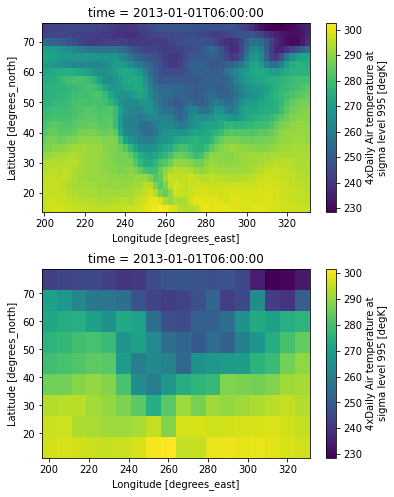

In [37]:
# import seaborn as sns
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# 导入空气温度数据集
REALds = xr.open_dataset(".data/air_temperature.nc").isel(time=1)
# 获取2013-01-01T06:00:00空气温度数据
data = REALds.air
data_thin = REALds.air.thin(lat=3, lon=3)
# 绘制热力图
# sns.set()
# ax = sns.heatmap(data, center=0)
fig = plt.figure(figsize=(6, 8))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
data.plot(ax=ax1)
data_thin.plot(ax=ax2)
plt.subplots_adjust(hspace=0.3)

## 基于坐标值对数据进行索引和分片

_**<font color=skyblue size=4><font color=orange>xarray</font>.sel( <font color=orange>dim1<font color=ff8888>=</font>value1</font>, <font color=orange>dim2<font color=ff8888>=</font>value2</font>, <font color=orange>...</font> )</font>**_

若要使用坐标名称筛选数据，可以使用类似于维度名称筛选数据的方法。  
只是使用的是 **<font color=skyblue>.sel()</font>** 方法而非 **<font color=skyblue>.isel()</font>** 方法。

In [38]:
arr = xr.DataArray(
        np.random.randint(0,10,(4,6)),
        dims=("x","y"),
        coords={
          "x":[-3.2,2.1,5.3,6.5],
          "y":pd.date_range("2009-01-05", periods=6, freq="M")
        }
)
arr.sel(x=5.3, y="2009-04-30")

<xarray.DataArray ()>
array(2)
Coordinates:
    x        float64 5.3
    y        datetime64[ns] 2009-04-30

_**<font size=4 color=skyblue><font color=orange>xarray</font>.loc[ { <font color=orange>"dim1"</font>: <font color=orange>value1</font>, <font color=orange>"dim2"</font>: <font color=orange>value2</font>, <font color=orange>"..."</font>: <font color=orange>...</font> } ]</font>**_

In [39]:
arr.loc[{"x":5.3, "y":"2009-04-30"}]

<xarray.DataArray ()>
array(2)
Coordinates:
    x        float64 5.3
    y        datetime64[ns] 2009-04-30

_**<font color=skyblue size=4><font color=orange>xarray</font>.sel( <font color=orange>dim1<font color=ff8888>=</font>value1</font>, <font color=orange>dim2<font color=ff8888>=</font>value2</font>, <font color=orange>...</font>, <font color=orange>method</font> )</font>**_

上述的筛选方法需要指定特定的坐标数据。如果缺少特定的坐标数据（比如你忘记了具体的值，只知道大致的值），可以使用 **<font color=orange>method</font>** 参数进行指定选取你给的坐标最近  **<font color=ff8888>"nearest"</font>** 的坐标数据。

In [40]:
arr.sel(x=4, y="2009-04-01", method="nearest")

<xarray.DataArray ()>
array(0)
Coordinates:
    x        float64 5.3
    y        datetime64[ns] 2009-03-31

_**<font size=4 color=skyblue><font color=orange>xarray</font>.sel( <font color=orange>dim1<font color=ff8888>=</font></font>[ <font color=orange>...</font> ],<font color=orange>dim2<font color=ff8888>=</font></font>[ <font color=orange>...</font> ], <font color=orange>...</font> )</font>**_  
  
_**<font size=4 color=skyblue><font color=orange>xarray</font>.sel( <font color=orange>dim1</font><font color=ff8888>=</font>slice( <font color=orange>start</font>, <font color=orange>end</font> ), <font color=orange>dim2</font><font color=ff8888>=</font>slice( <font color=orange>start</font>, <font color=orange>end</font> ), <font color=orange>...</font> )</font>**_  
  

当然除此之外，不单单选取一个值，也可以选取多重数据

对于坐标x而言（ **<font color=ff8888>"x":[-3.2,2.1,5.3,6.5]</font>** ），坐标的命名是 **<font color=ff8888>「离散」</font>** 的，因此在选取坐标x的时候需要进行 **<font color=ff8888>离散</font>** 选取。  
  
对于坐标y时间而言（ **<font color=ff8888>pd.date_range("2009-01-05", "2009-06-30", freq="M")</font>** ），产生数据的方法是 **<font color=ff8888>连续</font>** 的。  
这种 **<font color=ff8888>「连续性数据」</font>** 多个筛选则需要通过 **<font color=skyblue>slice</font>** 函数进行选取  


In [41]:
arr.sel(x=[-3.2, 6.5], y=slice("2009-04-01", "2009-05-31"))

<xarray.DataArray (x: 2, y: 2)>
array([[5, 6],
       [1, 2]])
Coordinates:
  * x        (x) float64 -3.2 6.5
  * y        (y) datetime64[ns] 2009-04-30 2009-05-31

_**<font size=4 color=skyblue><font color=orange>xarray</font>.drop_sel( <font color=orange>dim1</font>, <font color=orange>dim2</font>, <font color=orange>...</font> )</font>**_  

如果我们仅仅是想要抛弃原数据中的一些部分，则可以用 **<font color=skyblue>drop_sel</font>** 筛选抛弃的部分，留下剩余的部分。

In [42]:
arr.drop_sel(x=[-3.2, 5.3])

<xarray.DataArray (x: 2, y: 6)>
array([[7, 2, 2, 9, 9, 0],
       [9, 6, 8, 1, 2, 4]])
Coordinates:
  * x        (x) float64 2.1 6.5
  * y        (y) datetime64[ns] 2009-01-31 2009-02-28 ... 2009-05-31 2009-06-30

## 练习

首先导入练习数据

In [43]:
ds = xr.open_dataset(".data/air_temperature.nc")
ds

<xarray.Dataset>
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

1.筛选前30个纬度坐标且第20至40个经度坐标的数据

In [44]:
# 在这里写你的代码
ds.isel(lat=slice(None,30), lon=slice(20,40))

<xarray.Dataset>
Dimensions:  (lat: 25, time: 2920, lon: 20)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 250.0 252.5 255.0 257.5 ... 290.0 292.5 295.0 297.5
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

2.筛选北纬75度（75°N）且时间在2013年1月1日至2013年10月15日的数据

In [45]:
# 在这里写你的代码
ds.sel(lat=[75.0], time=slice("2013-01-01", "2013-10-01"))

<xarray.Dataset>
Dimensions:  (lat: 1, time: 1096, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2013-10-01T18:00:00
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

3.去除经度260（100°W）至270（90°W）的值后的数据

In [46]:
# 在这里写你的代码
ds.drop_sel(lon=np.arange(260, 271, 2.5))

<xarray.Dataset>
Dimensions:  (lat: 25, time: 2920, lon: 48)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

# 插值和广播

## 平面插值

_**<font size=4 color=skyblue><font color=orange>xarray</font>.interp( <font color=orange>dim1</font>, <font color=orange>dim2</font>, <font color=orange>...</font>, <font color=orange>method</font> )</font>**_

有时候想要知道格点框中更加高分辨率的值，这时候可以使用 **<font color=skyblue>interp</font>** 函数进行数据插值。

In [47]:
arr = xr.DataArray(
        np.random.randn(4,6),
        dims=("x","y"),
        coords={
          "x":[-3.2,2.1,5.3,6.5],
          "y":pd.date_range("2009-01-05", periods=6, freq="M")
        }
)
arr.interp(
  x=np.linspace(2, 6, 10),
  y=pd.date_range("2009-04-01", "2009-04-30", freq="D")
)

<xarray.DataArray (x: 10, y: 30)>
array([[ 0.22190705,  0.15741716,  0.09292728,  0.02843739, -0.03605249,
        -0.10054238, -0.16503226, -0.22952215, -0.29401203, -0.35850191,
        -0.4229918 , -0.48748168, -0.55197157, -0.61646145, -0.68095134,
        -0.74544122, -0.80993111, -0.87442099, -0.93891088, -1.00340076,
        -1.06789064, -1.13238053, -1.19687041, -1.2613603 , -1.32585018,
        -1.39034007, -1.45482995, -1.51931984, -1.58380972, -1.6482996 ],
       [ 0.47784045,  0.41191897,  0.3459975 ,  0.28007602,  0.21415454,
         0.14823307,  0.08231159,  0.01639012, -0.04953136, -0.11545284,
        -0.18137431, -0.24729579, -0.31321726, -0.37913874, -0.44506022,
        -0.51098169, -0.57690317, -0.64282464, -0.70874612, -0.7746676 ,
        -0.84058907, -0.90651055, -0.97243202, -1.0383535 , -1.10427498,
        -1.17019645, -1.23611793, -1.3020394 , -1.36796088, -1.43388236],
       [ 0.76619741,  0.70202038,  0.63784335,  0.57366633,  0.5094893 ,
         0.44531227,  0.38113524,  0.31695822,  0.25278119,  0.18860416,
         0.12442713,  0.06025011, -0.00392692, -0.06810395, -0.13228098,
        -0.196458  , -0.26063503, -0.32481206, -0.38898909, -0.45316611,
        -0.51734314, -0.58152017, -0.6456972 , -0.70987422, -0.77405125,
        -0.83822828, -0.90240531, -0.96658233, -1.03075936, -1.09493639],
       [ 1.05455437,  0.99212179,  0.92968921,  0.86725663,  0.80482405,
         0.74239147,  0.6799589 ,  0.61752632,  0.55509374,  0.49266116,
...
         0.77564058,  0.71844135,  0.66124211,  0.60404288,  0.54684365,
         0.48964441,  0.43244518,  0.37524595,  0.31804671,  0.26084748],
       [ 2.20798221,  2.15252743,  2.09707264,  2.04161786,  1.98616307,
         1.93070829,  1.8752535 ,  1.81979872,  1.76434393,  1.70888915,
         1.65343436,  1.59797958,  1.54252479,  1.48707001,  1.43161522,
         1.37616044,  1.32070565,  1.26525087,  1.20979608,  1.1543413 ,
         1.09888651,  1.04343173,  0.98797694,  0.93252216,  0.87706737,
         0.82161259,  0.7661578 ,  0.71070302,  0.65524823,  0.59979345],
       [ 1.72748672,  1.67931947,  1.63115222,  1.58298497,  1.53481772,
         1.48665048,  1.43848323,  1.39031598,  1.34214873,  1.29398148,
         1.24581423,  1.19764698,  1.14947973,  1.10131248,  1.05314523,
         1.00497798,  0.95681073,  0.90864348,  0.86047623,  0.81230898,
         0.76414174,  0.71597449,  0.66780724,  0.61963999,  0.57147274,
         0.52330549,  0.47513824,  0.42697099,  0.37880374,  0.33063649],
       [ 0.67870899,  0.64192634,  0.60514369,  0.56836104,  0.53157839,
         0.49479574,  0.45801309,  0.42123044,  0.38444779,  0.34766515,
         0.3108825 ,  0.27409985,  0.2373172 ,  0.20053455,  0.1637519 ,
         0.12696925,  0.0901866 ,  0.05340395,  0.0166213 , -0.02016135,
        -0.056944  , -0.09372665, -0.1305093 , -0.16729194, -0.20407459,
        -0.24085724, -0.27763989, -0.31442254, -0.35120519, -0.38798784]])
Coordinates:
  * x        (x) float64 2.0 2.444 2.889 3.333 3.778 4.222 4.667 5.111 5.556 6.0
  * y        (y) datetime64[ns] 2009-04-01 2009-04-02 ... 2009-04-29 2009-04-30

如果给定插值后的范围<font color=ff8888>大于原有的范围（外推）</font>的话，在原有数据范围外的数据将会赋值为 **<font color=ff8888>NaN</font>** 。

_**<font size=4 color=skyblue><font color=orange>xarray1</font>.interp_like( <font color=orange>xarray2</font> )</font>**_

如果已经有一个包含给定插值模板的对象，只需用interp_like即可实现插值

In [48]:
other = xr.DataArray(
  dims=("x", "y"),
  coords={
    "x": np.linspace(2, 4, 10),
    "y": pd.date_range("2009-04-01", "2009-04-30", freq="D")
  }
)
arr.interp_like(other)

<xarray.DataArray (x: 10, y: 30)>
array([[ 2.21907046e-01,  1.57417162e-01,  9.29272771e-02,
         2.84373926e-02, -3.60524919e-02, -1.00542376e-01,
        -1.65032261e-01, -2.29522145e-01, -2.94012030e-01,
        -3.58501914e-01, -4.22991799e-01, -4.87481683e-01,
        -5.51971568e-01, -6.16461452e-01, -6.80951337e-01,
        -7.45441222e-01, -8.09931106e-01, -8.74420991e-01,
        -9.38910875e-01, -1.00340076e+00, -1.06789064e+00,
        -1.13238053e+00, -1.19687041e+00, -1.26136030e+00,
        -1.32585018e+00, -1.39034007e+00, -1.45482995e+00,
        -1.51931984e+00, -1.58380972e+00, -1.64829960e+00],
       [ 3.33661969e-01,  2.66868268e-01,  2.00074568e-01,
         1.33280868e-01,  6.64871673e-02, -3.06533010e-04,
        -6.71002333e-02, -1.33893934e-01, -2.00687634e-01,
        -2.67481334e-01, -3.34275035e-01, -4.01068735e-01,
        -4.67862435e-01, -5.34656136e-01, -6.01449836e-01,
        -6.68243536e-01, -7.35037237e-01, -8.01830937e-01,
        -8.68624637e-01, -9.35418337e-01, -1.00221204e+00,
        -1.06900574e+00, -1.13579944e+00, -1.20259314e+00,
        -1.26938684e+00, -1.33618054e+00, -1.40297424e+00,
        -1.46976794e+00, -1.53656164e+00, -1.60335534e+00],
...
       [ 1.34291133e+00,  1.28222320e+00,  1.22153507e+00,
         1.16084694e+00,  1.10015881e+00,  1.03947068e+00,
         9.78782546e-01,  9.18094416e-01,  8.57406285e-01,
         7.96718155e-01,  7.36030024e-01,  6.75341894e-01,
         6.14653763e-01,  5.53965633e-01,  4.93277502e-01,
         4.32589372e-01,  3.71901241e-01,  3.11213111e-01,
         2.50524980e-01,  1.89836850e-01,  1.29148719e-01,
         6.84605886e-02,  7.77245804e-03, -5.29156725e-02,
        -1.13603803e-01, -1.74291934e-01, -2.34980064e-01,
        -2.95668195e-01, -3.56356325e-01, -4.17044456e-01],
       [ 1.48708981e+00,  1.42727390e+00,  1.36745800e+00,
         1.30764209e+00,  1.24782618e+00,  1.18801028e+00,
         1.12819437e+00,  1.06837847e+00,  1.00856256e+00,
         9.48746653e-01,  8.88930747e-01,  8.29114841e-01,
         7.69298935e-01,  7.09483028e-01,  6.49667122e-01,
         5.89851216e-01,  5.30035309e-01,  4.70219403e-01,
         4.10403497e-01,  3.50587591e-01,  2.90771684e-01,
         2.30955778e-01,  1.71139872e-01,  1.11323966e-01,
         5.15080593e-02, -8.30784698e-03, -6.81237533e-02,
        -1.27939660e-01, -1.87755566e-01, -2.47571472e-01]])
Coordinates:
  * x        (x) float64 2.0 2.222 2.444 2.667 2.889 3.111 3.333 3.556 3.778 4.0
  * y        (y) datetime64[ns] 2009-04-01 2009-04-02 ... 2009-04-29 2009-04-30

对于插值方法的选取，可以通过指定 **<font color=orange>method</font>** 方法（默认为 **<font color=ff8888>"linear"</font>** ）来实现切换平面插值方法（ **<font color=ff8888>"nearest"</font>** ）。比如指定使用临近点插值

In [49]:
arr.interp(
  x=np.linspace(2, 6, 10),
  y=pd.date_range("2009-04-01", "2009-04-30", freq="D"),
  method='nearest'
)

<xarray.DataArray (x: 10, y: 30)>
array([[ 0.32163723,  0.32163723,  0.32163723,  0.32163723,  0.32163723,
         0.32163723,  0.32163723,  0.32163723,  0.32163723,  0.32163723,
         0.32163723,  0.32163723,  0.32163723,  0.32163723,  0.32163723,
        -1.69656548, -1.69656548, -1.69656548, -1.69656548, -1.69656548,
        -1.69656548, -1.69656548, -1.69656548, -1.69656548, -1.69656548,
        -1.69656548, -1.69656548, -1.69656548, -1.69656548, -1.69656548],
       [ 0.32163723,  0.32163723,  0.32163723,  0.32163723,  0.32163723,
         0.32163723,  0.32163723,  0.32163723,  0.32163723,  0.32163723,
         0.32163723,  0.32163723,  0.32163723,  0.32163723,  0.32163723,
        -1.69656548, -1.69656548, -1.69656548, -1.69656548, -1.69656548,
        -1.69656548, -1.69656548, -1.69656548, -1.69656548, -1.69656548,
        -1.69656548, -1.69656548, -1.69656548, -1.69656548, -1.69656548],
       [ 0.32163723,  0.32163723,  0.32163723,  0.32163723,  0.32163723,
         0.32163723,  0.32163723,  0.32163723,  0.32163723,  0.32163723,
         0.32163723,  0.32163723,  0.32163723,  0.32163723,  0.32163723,
        -1.69656548, -1.69656548, -1.69656548, -1.69656548, -1.69656548,
        -1.69656548, -1.69656548, -1.69656548, -1.69656548, -1.69656548,
        -1.69656548, -1.69656548, -1.69656548, -1.69656548, -1.69656548],
       [ 0.32163723,  0.32163723,  0.32163723,  0.32163723,  0.32163723,
         0.32163723,  0.32163723,  0.32163723,  0.32163723,  0.32163723,
...
         0.74384548,  0.74384548,  0.74384548,  0.74384548,  0.74384548,
         0.74384548,  0.74384548,  0.74384548,  0.74384548,  0.74384548],
       [ 2.38524731,  2.38524731,  2.38524731,  2.38524731,  2.38524731,
         2.38524731,  2.38524731,  2.38524731,  2.38524731,  2.38524731,
         2.38524731,  2.38524731,  2.38524731,  2.38524731,  2.38524731,
         0.74384548,  0.74384548,  0.74384548,  0.74384548,  0.74384548,
         0.74384548,  0.74384548,  0.74384548,  0.74384548,  0.74384548,
         0.74384548,  0.74384548,  0.74384548,  0.74384548,  0.74384548],
       [ 2.38524731,  2.38524731,  2.38524731,  2.38524731,  2.38524731,
         2.38524731,  2.38524731,  2.38524731,  2.38524731,  2.38524731,
         2.38524731,  2.38524731,  2.38524731,  2.38524731,  2.38524731,
         0.74384548,  0.74384548,  0.74384548,  0.74384548,  0.74384548,
         0.74384548,  0.74384548,  0.74384548,  0.74384548,  0.74384548,
         0.74384548,  0.74384548,  0.74384548,  0.74384548,  0.74384548],
       [-0.47719099, -0.47719099, -0.47719099, -0.47719099, -0.47719099,
        -0.47719099, -0.47719099, -0.47719099, -0.47719099, -0.47719099,
        -0.47719099, -0.47719099, -0.47719099, -0.47719099, -0.47719099,
        -1.19644021, -1.19644021, -1.19644021, -1.19644021, -1.19644021,
        -1.19644021, -1.19644021, -1.19644021, -1.19644021, -1.19644021,
        -1.19644021, -1.19644021, -1.19644021, -1.19644021, -1.19644021]])
Coordinates:
  * x        (x) float64 2.0 2.444 2.889 3.333 3.778 4.222 4.667 5.111 5.556 6.0
  * y        (y) datetime64[ns] 2009-04-01 2009-04-02 ... 2009-04-29 2009-04-30

其他的插值方法参见下表所示  
  
|method   |插值方法    |一维插值|二维插值|
|---------|-----------|-------|-------|
|nearest  |临近点插值  |   √   |   √   |
|linear   |线性插值    |   √   |   √   |
|zero     |零阶样条插值|   √   |   ×   |
|slinear  |一阶样条插值|   √   |   ×   |
|quadratic|二阶样条插值|   √   |   ×   |
|cubic    |三阶样条插值|   √   |   ×   |

### 练习

通过增加步长的形式将纬度（lat）和经度（lon）的分辨率从 2.5° 增加到 1°。

In [50]:
ds = xr.open_dataset(".data/air_temperature.nc")
display(ds)
# 在这里写你的代码
ds.interp(
    lon=np.arange(200, 331, 1), 
    lat=np.arange(75, 14, -1),
    method="linear"
)

<xarray.Dataset>
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

<xarray.Dataset>
Dimensions:  (time: 2920, lat: 61, lon: 131)
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
  * lon      (lon) int64 200 201 202 203 204 205 206 ... 325 326 327 328 329 330
  * lat      (lat) int64 75 74 73 72 71 70 69 68 67 ... 22 21 20 19 18 17 16 15
Data variables:
    air      (time, lat, lon) float64 241.2 241.7 242.2 ... 296.1 295.9 295.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

## 数据广播和对齐

### 维度名相同的广播

a+b自动筛选了a, b的 DataArray 中具有共同维度的共同坐标的数据进行相加

In [51]:
a = xr.DataArray(
    [[10, 20, 30, 40],
     [50, 60, 70, 80], 
     [90, 100, 110, 120]],
    dims=("x", "y"),
    coords={"x": ["b", "c", "d"], "y": np.arange(1, 5)},
)
b = xr.DataArray(
    [[1, 2, 3, 4],
     [5, 6, 7, 8], 
     [9, 10, 11, 12]],
    dims=("x", "y"),
    coords={"x": ["a", "b", "c"], "y": np.arange(0, 4)},
)
print(a.data)
print(b.data)
print((a + b).data)

[[ 10  20  30  40]
 [ 50  60  70  80]
 [ 90 100 110 120]]
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[[16 27 38]
 [60 71 82]]


_**<font size=4 color=skyblue>xr.align( <font color=orange>xarray1</font>, <font color=orange>xarray2</font>, <font color=orange>join</font> )</font>**_

等价于：对齐 → 加减

In [52]:
a_, b_ = xr.align(a, b, join="inner")
print(a_.data)
print(b_.data)
print((a_+b_).data)

[[10 20 30]
 [50 60 70]]
[[ 6  7  8]
 [10 11 12]]
[[16 27 38]
 [60 71 82]]


当然若要指定不同的广播方法，可以用 xr.align 函数的 join 进行指定。  
  
默认情况下广播的方法是取交集，即join="inner"。除此之外，join的取值还有outer, left, right, exact, override六类取值。  
> inner：提取两者变量索引的交集  
> outer：提取两者变量索引的并集  
> left：提取仅具有左侧变量索引对应的数据  
> right：提取仅具有右侧变量索引对应的数据  
> exact：检验索引是否完全对齐，若左右变量的索引无法对齐，会抛出 ValueError 错误  
> override：如果索引、数据的尺寸大小相同，则将右侧变量的索引重写为左侧变量的的索引

In [53]:
a_, b_ =xr.align(a, b, join="override")
a_.coords, b_.coords

(Coordinates:
   * x        (x) <U1 'b' 'c' 'd'
   * y        (y) int64 1 2 3 4,
 Coordinates:
   * x        (x) <U1 'b' 'c' 'd'
   * y        (y) int64 1 2 3 4)

### 维度名不同的广播

类似的也有如下两个数组的广播（对齐）相加

In [54]:
arr1 = xr.DataArray(
    [1,2,3],
    dims="x",
    coords={"x": ["a", "b", "c"]},
)
arr2 = xr.DataArray(
    [10,20,30,40],
    dims="y",
    coords={"y": np.arange(4)},
)
arr1 + arr2

<xarray.DataArray (x: 3, y: 4)>
array([[11, 21, 31, 41],
       [12, 22, 32, 42],
       [13, 23, 33, 43]])
Coordinates:
  * x        (x) <U1 'a' 'b' 'c'
  * y        (y) int64 0 1 2 3

_**<font size=4 color=skyblue>xr.broadcast( <font color=orange>xarray1</font>, <font color=orange>xarray2</font> )</font>**_

等价于：广播 / 对齐 → 相加

In [55]:
arr1_, arr2_ = xr.broadcast(arr1, arr2) #广播/对齐
print(arr1_.data)
print(arr2_.data)
arr1_ + arr2_

[[1 1 1 1]
 [2 2 2 2]
 [3 3 3 3]]
[[10 20 30 40]
 [10 20 30 40]
 [10 20 30 40]]


<xarray.DataArray (x: 3, y: 4)>
array([[11, 21, 31, 41],
       [12, 22, 32, 42],
       [13, 23, 33, 43]])
Coordinates:
  * x        (x) <U1 'a' 'b' 'c'
  * y        (y) int64 0 1 2 3